### Gmarket
- 베스트 상품 200개 데이터 수집
- 상품의 이미지 200개 다운로드

In [84]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

#### 1. URL 찾기

In [2]:
url = 'https://www.gmarket.co.kr/n/best?jaehuid=200001169'

#### 2. request > response : str(html)

In [3]:
response = requests.get(url)
response

<Response [200]>

In [4]:
response.text[:100]

'<!DOCTYPE html><html lang="ko" class="no-js"><head><meta name="viewport" content="width=980"/><meta '

#### 3. bs > DataFrame

In [12]:
dom = BeautifulSoup(response.text, 'html.parser')

In [17]:
# elements = dom.select('.best-list > ul > li') 이렇게 눈으로 보고 할 수도 있고
# elements = dom.select('#gBestWrap > div.best-list > ul > li') chrome 개발자도구 해당 element에서
# 우클릭 -> Copy -> copy selector로 할 수도 있다.
elements = dom.select('.best-list > ul > li')
len(elements)

200

In [26]:
element = elements[0]

In [36]:
data = {
    'title': element.select_one('.itemname').text,
    'link': element.select_one('.itemname').get('href'),
    'img': 'https:'+ element.select_one('.image__lazy').get('src'),
    'o_price': element.select_one('.o-price').text,
    's_price': element.select_one('.s-price').text.split(' ')[0],
}

data

{'title': '네추럴라이즈 키즈 멀티비타민 C/D 60꾸미 3종 3병',
 'link': 'http://item.gmarket.co.kr/Item?goodscode=3113057185&ver=20230825',
 'img': 'https://gdimg.gmarket.co.kr/3113057185/still/300?ver=20230825',
 'o_price': '정가22,900원',
 's_price': '할인가21,760원'}

In [38]:
items = []
for element in elements:
    items.append({
        'title': element.select_one('.itemname').text,
        'link': element.select_one('.itemname').get('href'),
        'img': 'https:'+ element.select_one('.image__lazy').get('src'),
        'o_price': element.select_one('.o-price').text,
        's_price': element.select_one('.s-price').text.split(' ')[0],
    })

items[:2]

[{'title': '네추럴라이즈 키즈 멀티비타민 C/D 60꾸미 3종 3병',
  'link': 'http://item.gmarket.co.kr/Item?goodscode=3113057185&ver=20230825',
  'img': 'https://gdimg.gmarket.co.kr/3113057185/still/300?ver=20230825',
  'o_price': '정가22,900원',
  's_price': '할인가21,760원'},
 {'title': '[CGV](CGV) G마켓 예매권(금요특가_8/25)',
  'link': 'http://item.gmarket.co.kr/Item?goodscode=3075338164&ver=20230825',
  'img': 'https://gdimg.gmarket.co.kr/3075338164/still/300?ver=20230825',
  'o_price': '정가15,000원',
  's_price': '할인가9,980원'}]

In [39]:
df = pd.DataFrame(items)
df.head()

,title,link,img,o_price,s_price
0,네추럴라이즈 키즈 멀티비타민 C/D 60꾸미 3종 3병,http://item.gmarket.co.kr/Item?goodscode=31130...,https://gdimg.gmarket.co.kr/3113057185/still/3...,"정가22,900원","할인가21,760원"
1,[CGV](CGV) G마켓 예매권(금요특가_8/25),http://item.gmarket.co.kr/Item?goodscode=30753...,https://gdimg.gmarket.co.kr/3075338164/still/3...,"정가15,000원","할인가9,980원"
2,나이키 뉴발란스 스우시 6팩 크루삭스 운동 스포츠양말,http://item.gmarket.co.kr/Item?goodscode=21052...,https://gdimg.gmarket.co.kr/2105251652/still/3...,"정가25,800원","할인가12,900원"
3,[팸퍼스]팸퍼스 아르모니 팬티형 5단계(20X4),http://item.gmarket.co.kr/Item?goodscode=22199...,https://gdimg.gmarket.co.kr/2219928058/still/3...,,"할인가45,900원"
4,(특가) 우리 아기 첫 영어사전 First 100 Collection 전5권 세트 ...,http://item.gmarket.co.kr/Item?goodscode=31395...,https://gdimg.gmarket.co.kr/3139517831/still/3...,"정가325,000원","할인가144,900원"


In [41]:
df[['o_price', 's_price']].head()

,o_price,s_price
0,"정가22,900원","할인가21,760원"
1,"정가15,000원","할인가9,980원"
2,"정가25,800원","할인가12,900원"
3,,"할인가45,900원"
4,"정가325,000원","할인가144,900원"


In [86]:
def change_number_o_price(data):
    return data.replace(',', '')[2:-1]

In [87]:
def change_number_s_price(data):
    return data.replace(',', '')[3:-1]

In [88]:
df1 = df.copy()

In [89]:
df1['o_price'] = df1['o_price'].apply(change_number_o_price)
df1['s_price'] = df1['s_price'].apply(change_number_s_price)
df1.head()

,title,link,img,o_price,s_price
0,네추럴라이즈 키즈 멀티비타민 C/D 60꾸미 3종 3병,http://item.gmarket.co.kr/Item?goodscode=31130...,https://gdimg.gmarket.co.kr/3113057185/still/3...,22900,21760
1,[CGV](CGV) G마켓 예매권(금요특가_8/25),http://item.gmarket.co.kr/Item?goodscode=30753...,https://gdimg.gmarket.co.kr/3075338164/still/3...,15000,9980
2,나이키 뉴발란스 스우시 6팩 크루삭스 운동 스포츠양말,http://item.gmarket.co.kr/Item?goodscode=21052...,https://gdimg.gmarket.co.kr/2105251652/still/3...,25800,12900
3,[팸퍼스]팸퍼스 아르모니 팬티형 5단계(20X4),http://item.gmarket.co.kr/Item?goodscode=22199...,https://gdimg.gmarket.co.kr/2219928058/still/3...,,45900
4,(특가) 우리 아기 첫 영어사전 First 100 Collection 전5권 세트 ...,http://item.gmarket.co.kr/Item?goodscode=31395...,https://gdimg.gmarket.co.kr/3139517831/still/3...,325000,144900


In [90]:
df1.loc[df1['o_price'] == '', 'o_price'] = df1['s_price']
df1.head()

,title,link,img,o_price,s_price
0,네추럴라이즈 키즈 멀티비타민 C/D 60꾸미 3종 3병,http://item.gmarket.co.kr/Item?goodscode=31130...,https://gdimg.gmarket.co.kr/3113057185/still/3...,22900,21760
1,[CGV](CGV) G마켓 예매권(금요특가_8/25),http://item.gmarket.co.kr/Item?goodscode=30753...,https://gdimg.gmarket.co.kr/3075338164/still/3...,15000,9980
2,나이키 뉴발란스 스우시 6팩 크루삭스 운동 스포츠양말,http://item.gmarket.co.kr/Item?goodscode=21052...,https://gdimg.gmarket.co.kr/2105251652/still/3...,25800,12900
3,[팸퍼스]팸퍼스 아르모니 팬티형 5단계(20X4),http://item.gmarket.co.kr/Item?goodscode=22199...,https://gdimg.gmarket.co.kr/2219928058/still/3...,45900,45900
4,(특가) 우리 아기 첫 영어사전 First 100 Collection 전5권 세트 ...,http://item.gmarket.co.kr/Item?goodscode=31395...,https://gdimg.gmarket.co.kr/3139517831/still/3...,325000,144900


In [92]:
df1['o_price'] = df1['o_price'].astype('int')
df1['s_price'] = df1['s_price'].astype('int')
df1.dtypes

title      object
link       object
img        object
o_price     int32
s_price     int32
dtype: object

In [93]:
df1.head()

,title,link,img,o_price,s_price
0,네추럴라이즈 키즈 멀티비타민 C/D 60꾸미 3종 3병,http://item.gmarket.co.kr/Item?goodscode=31130...,https://gdimg.gmarket.co.kr/3113057185/still/3...,22900,21760
1,[CGV](CGV) G마켓 예매권(금요특가_8/25),http://item.gmarket.co.kr/Item?goodscode=30753...,https://gdimg.gmarket.co.kr/3075338164/still/3...,15000,9980
2,나이키 뉴발란스 스우시 6팩 크루삭스 운동 스포츠양말,http://item.gmarket.co.kr/Item?goodscode=21052...,https://gdimg.gmarket.co.kr/2105251652/still/3...,25800,12900
3,[팸퍼스]팸퍼스 아르모니 팬티형 5단계(20X4),http://item.gmarket.co.kr/Item?goodscode=22199...,https://gdimg.gmarket.co.kr/2219928058/still/3...,45900,45900
4,(특가) 우리 아기 첫 영어사전 First 100 Collection 전5권 세트 ...,http://item.gmarket.co.kr/Item?goodscode=31395...,https://gdimg.gmarket.co.kr/3139517831/still/3...,325000,144900


In [94]:
# 할인율 column 추가
df1['discount_rate'] = np.round((1 - df1['s_price'] / df1['o_price']) * 100, 2)
df1.head()

,title,link,img,o_price,s_price,discount_rate
0,네추럴라이즈 키즈 멀티비타민 C/D 60꾸미 3종 3병,http://item.gmarket.co.kr/Item?goodscode=31130...,https://gdimg.gmarket.co.kr/3113057185/still/3...,22900,21760,4.98
1,[CGV](CGV) G마켓 예매권(금요특가_8/25),http://item.gmarket.co.kr/Item?goodscode=30753...,https://gdimg.gmarket.co.kr/3075338164/still/3...,15000,9980,33.47
2,나이키 뉴발란스 스우시 6팩 크루삭스 운동 스포츠양말,http://item.gmarket.co.kr/Item?goodscode=21052...,https://gdimg.gmarket.co.kr/2105251652/still/3...,25800,12900,50.00
3,[팸퍼스]팸퍼스 아르모니 팬티형 5단계(20X4),http://item.gmarket.co.kr/Item?goodscode=22199...,https://gdimg.gmarket.co.kr/2219928058/still/3...,45900,45900,0.00
4,(특가) 우리 아기 첫 영어사전 First 100 Collection 전5권 세트 ...,http://item.gmarket.co.kr/Item?goodscode=31395...,https://gdimg.gmarket.co.kr/3139517831/still/3...,325000,144900,55.42


In [95]:
df1.dtypes

title             object
link              object
img               object
o_price            int32
s_price            int32
discount_rate    float64
dtype: object

#### 4. download image

In [104]:
df2 = df1.copy()

In [105]:
df2 = df2[['title', 'img']]
df2.head()

,title,img
0,네추럴라이즈 키즈 멀티비타민 C/D 60꾸미 3종 3병,https://gdimg.gmarket.co.kr/3113057185/still/3...
1,[CGV](CGV) G마켓 예매권(금요특가_8/25),https://gdimg.gmarket.co.kr/3075338164/still/3...
2,나이키 뉴발란스 스우시 6팩 크루삭스 운동 스포츠양말,https://gdimg.gmarket.co.kr/2105251652/still/3...
3,[팸퍼스]팸퍼스 아르모니 팬티형 5단계(20X4),https://gdimg.gmarket.co.kr/2219928058/still/3...
4,(특가) 우리 아기 첫 영어사전 First 100 Collection 전5권 세트 ...,https://gdimg.gmarket.co.kr/3139517831/still/3...


In [101]:
import os
dname = 'imgs'
if not os.path.exists(dname):
    os.makedirs(dname)

In [107]:
link = df2.loc[0, 'img']
link

'https://gdimg.gmarket.co.kr/3113057185/still/300?ver=20230825'

In [108]:
response = requests.get(link)
response

<Response [200]>

In [109]:
response.text[:100]

"����\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00��\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&')*)\x19\x1f-0-(0%()(��\x00C\x01\x07\x07\x07\n\x08\n"

In [110]:
with open(f'{dname}/test.png', 'wb') as file:
    file.write(response.content)

In [111]:
from PIL import Image as pil

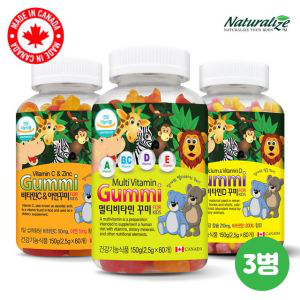

In [112]:
pil.open(f'{dname}/test.png')

In [116]:
for idx, data in df2[:5].iterrows(): 
    print(idx, data['img']) 
    response = requests.get(data['img']) 
    with open(f'{dname}/{idx}.png', 'wb') as file: 
        file.write(response.content)

0 https://gdimg.gmarket.co.kr/3113057185/still/300?ver=20230825
1 https://gdimg.gmarket.co.kr/3075338164/still/300?ver=20230825
2 https://gdimg.gmarket.co.kr/2105251652/still/300?ver=20230825
3 https://gdimg.gmarket.co.kr/2219928058/still/300?ver=20230825
4 https://gdimg.gmarket.co.kr/3139517831/still/300?ver=20230825


In [ ]:
pil.open(f'{dname}/test.png')